# Getting the most solar power for your dollar
## Exploratory Data Analysis
### Zachary Brown

Now that the raw data has been wrangled into a useful dataframe it is time to explore the data and identify correlations and trends that may be important for modeling. 

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
print(os.getcwd())
os.chdir(r"..\data\interim")
print(os.getcwd())

C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\notebooks
C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\data\interim


In [3]:
data = pd.read_csv('wrangled_data.csv', index_col=0, low_memory=False)
data.shape

(208257, 57)

In [4]:
data.head()

,data_provider_1,system_id_1,installation_date,system_size_dc,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,tracking,...,state_MA,state_MD,state_MN,state_NH,state_NM,state_NY,state_RI,state_TX,state_UT,state_WI
108019,Arizona Public Service,107903,2020-06-17,5.760,17488.26,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108020,Arizona Public Service,107904,2020-06-17,8.750,22631.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108142,Arizona Public Service,108026,2020-06-19,4.725,18972.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108175,Arizona Public Service,108059,2020-06-22,3.550,9900.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
108233,Arizona Public Service,108117,2020-06-23,5.850,20475.00,0.0,RES,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['data_provider_1', 'system_id_1', 'installation_date', 'system_size_dc',
       'total_installed_price', 'rebate_or_grant', 'customer_segment',
       'expansion_system', 'multiple_phase_system', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'utility_service_territory',
       'third_party_owned', 'installer_name', 'self_installed', 'azimuth_1',
       'tilt_1', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'additional_modules', 'technology_module_1',
       'bipv_module_1', 'bifacial_module_1', 'nameplate_capacity_module_1',
       'efficiency_module_1', 'inverter_manufacturer_1', 'inverter_model_1',
       'inverter_quantity_1', 'additional_inverters', 'micro_inverter_1',
       'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1',
       'dc_optimizer', 'inverter_loading_ratio', 'date_of_battery_install',
       'year', 'month', 'price_per_kw', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DE', 'state_FL', 'state_M

In [6]:
col = data.columns.to_series().groupby(data.dtypes).groups
print(col)

{int64: ['expansion_system', 'multiple_phase_system', 'tracking', 'ground_mounted', 'third_party_owned', 'self_installed', 'module_quantity_1', 'additional_modules', 'bipv_module_1', 'bifacial_module_1', 'additional_inverters', 'micro_inverter_1', 'solar_storage_hybrid_inverter_1', 'built_in_meter_inverter_1', 'dc_optimizer', 'month', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DE', 'state_FL', 'state_MA', 'state_MD', 'state_MN', 'state_NH', 'state_NM', 'state_NY', 'state_RI', 'state_TX', 'state_UT', 'state_WI'], float64: ['system_size_dc', 'total_installed_price', 'rebate_or_grant', 'azimuth_1', 'tilt_1', 'nameplate_capacity_module_1', 'efficiency_module_1', 'inverter_quantity_1', 'inverter_loading_ratio', 'year', 'price_per_kw'], object: ['data_provider_1', 'system_id_1', 'installation_date', 'customer_segment', 'zip_code', 'city', 'utility_service_territory', 'installer_name', 'module_manufacturer_1', 'module_model_1', 'technology_module_1', 'inverter_manufacturer_1', 'in

I want to first take a look at correlation coefficients between price_per_kw and each other feature in my dataset to give me a quick idea of what features may need to be investigated further.

In [68]:
data.corr()['price_per_kw'].sort_values()

rebate_or_grant                   -0.037054
system_size_dc                    -0.025756
inverter_quantity_1               -0.021426
state_TX                          -0.018244
state_CT                          -0.017290
state_MD                          -0.014046
self_installed                    -0.013768
state_MA                          -0.012437
state_FL                          -0.010123
state_AZ                          -0.009681
state_NH                          -0.006970
state_DE                          -0.006405
month                             -0.005913
state_WI                          -0.005804
state_RI                          -0.004942
state_MN                          -0.004148
year                              -0.003736
micro_inverter_1                  -0.001786
third_party_owned                 -0.001645
module_quantity_1                 -0.001538
state_NM                          -0.000539
state_NY                          -0.000379
state_CO                        

There are two very large correlations here: price_per_kw with itself, and price_per_kw with total_installed_price from which it is derived. Given the very wide gap between those two and the rest of the correlation values I will plot the correlation values on a bar plot with a log scale, and I'll look at the absolute values of the correlation coefficients since you can't take the log of a negative.

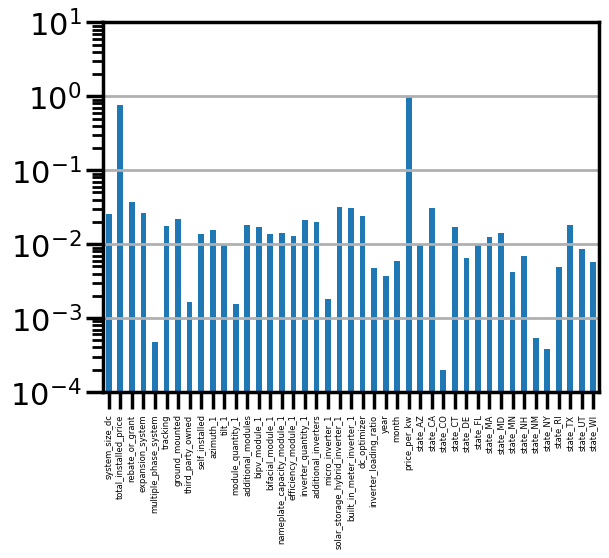

In [67]:
corrs = abs(data.corr()['price_per_kw'])
corrs.plot(kind='bar', log=True)
plt.ylim([0.0001, 10])
plt.xticks(fontsize=6)
plt.grid(axis='y')
plt.show()

One useful tool to quickly identify a difference in distributions is the empirical cumulative distribution function (ECDF). I'd like to determine whether there are any clear differences in prices per KW in TX versus the rest of the US, so I will first create a function to quickly produce an EDCF for a given column. Then I'll create two new dataframes, one with just TX data, the other with all other states. Then I'll overlay the ECDFs of both to compare. 

In [7]:
def ecdf(column):
    n = len(column)

    # x-data for the ECDF: x
    x = np.sort(column)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [8]:
# Creating the two new dataframes
tx = data[data['state_TX'] == 1]
not_tx = data[data['state_TX'] == 0]

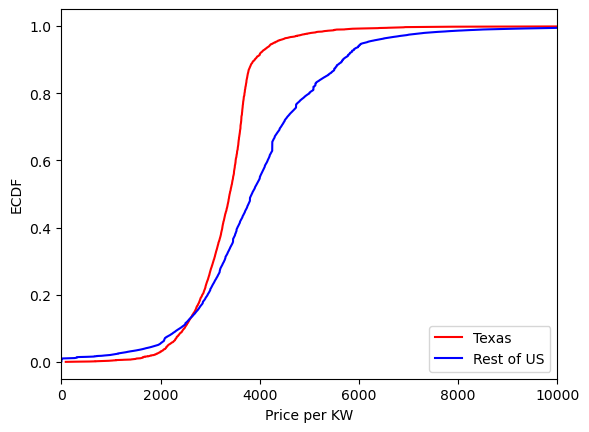

In [9]:
# Plotting the two ECDFs against one another

tx_x, tx_y = ecdf(tx['price_per_kw'])
us_x, us_y = ecdf(not_tx['price_per_kw'])

plt.plot(tx_x, tx_y, color='r')
plt.plot(us_x, us_y, color='b')
plt.xlim(0,10000)
plt.xlabel('Price per KW')
plt.ylabel('ECDF')
plt.legend(['Texas', 'Rest of US'], loc='lower right')
plt.show()

Very interesting! Although the rest of the US has some installations that are more cost efficient than those in Texas, the Texas installations as a whole tend to be more cost efficient than the rest of the country. It seems likely that this will factor into the model later on.

* Consider permuting results assuming null hypothesis that there is no difference then calculate p-value

It seems very possible that pricing may vary throughout the year given seasonal changes in weather. For example one might expect an increase in installations, and hence an increase in price, during the winter or spring so that the panels are ready in time for summer. I'll prepare a series of boxplots of the price per KW broken down by month to get a quick look at whether there is any month to month effect.

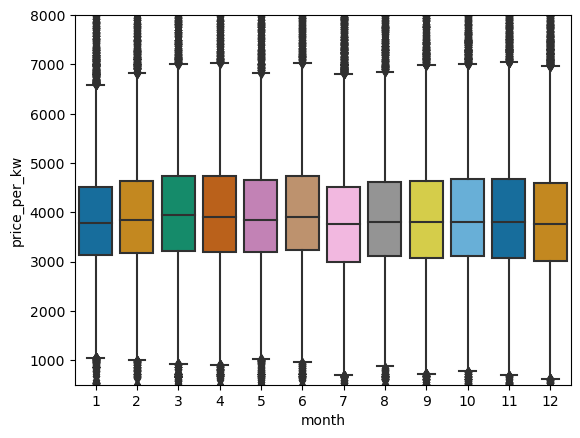

In [10]:
sns.boxplot(x='month', y='price_per_kw', data=data, palette='colorblind')
plt.ylim(500, 8000)
plt.show()

Now I want to check for quick correlations in the categorical columns such as 'expansion_system', 'multiple_phase_system', etc. To do so I'll create a loop to automatically make box plots for each.

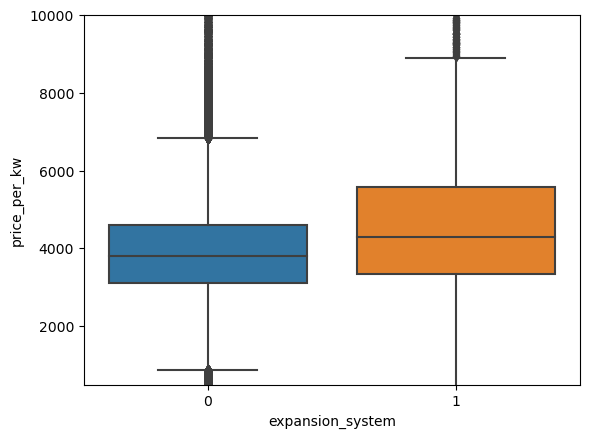

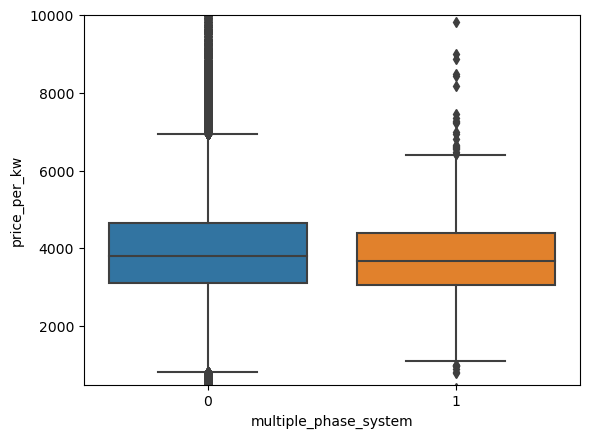

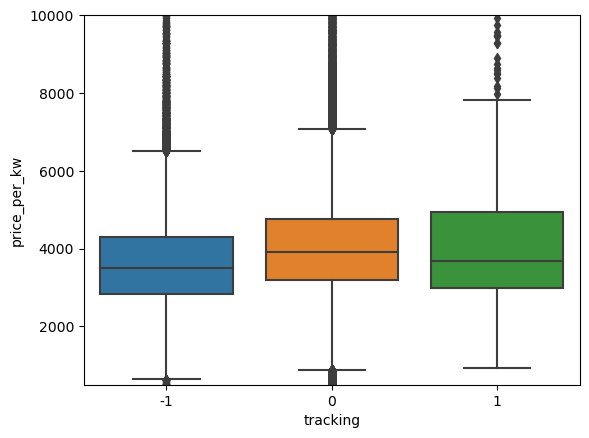

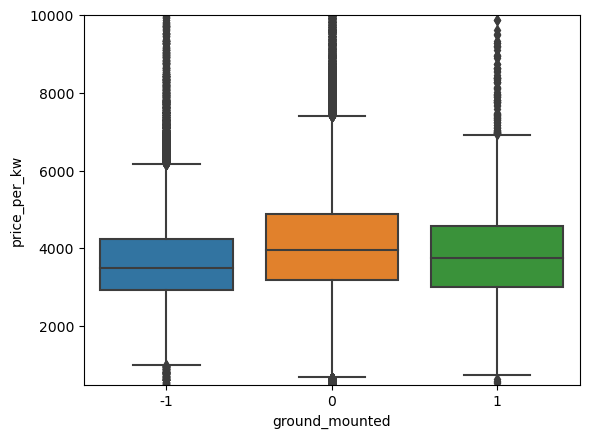

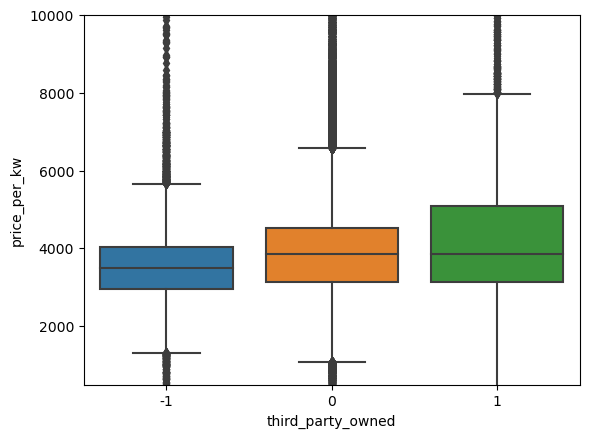

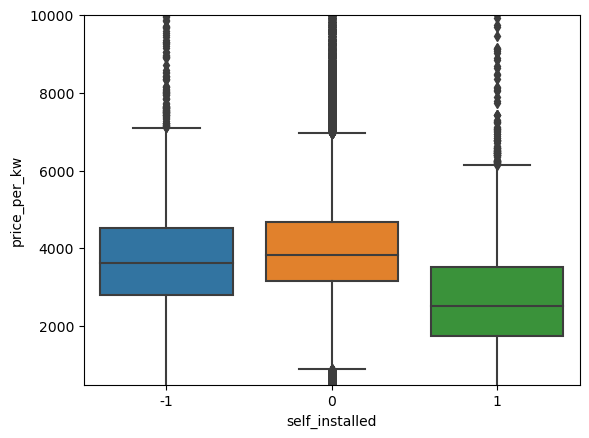

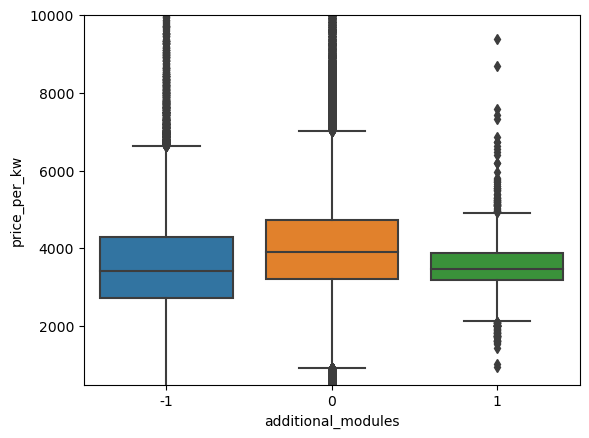

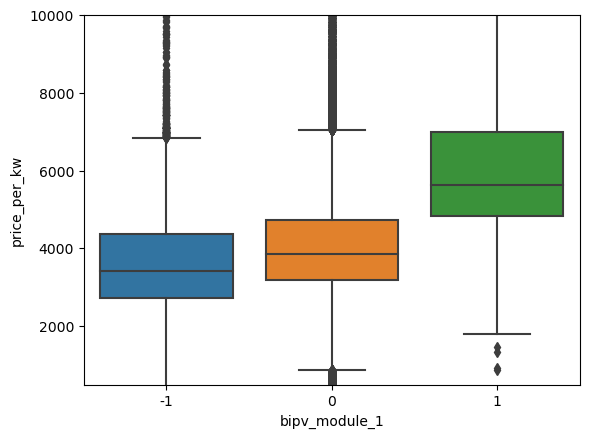

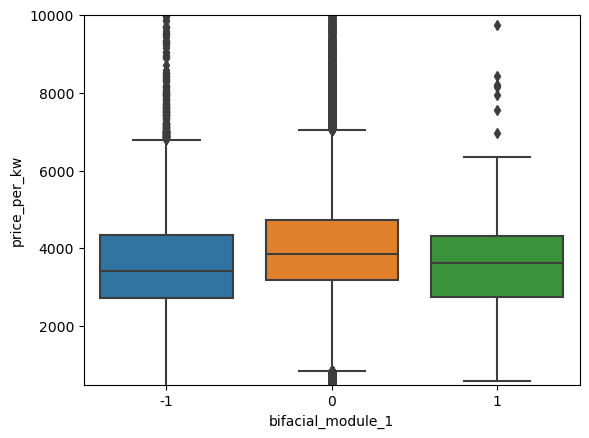

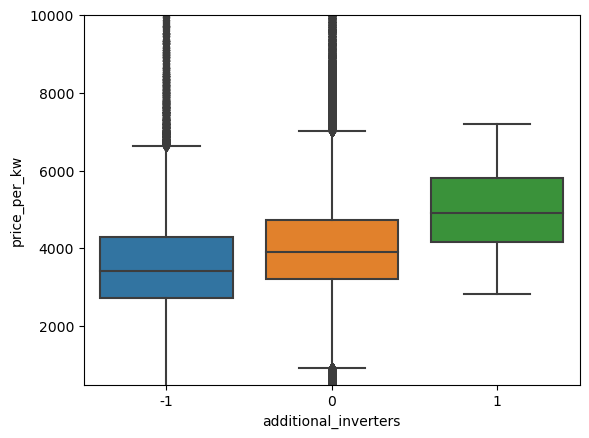

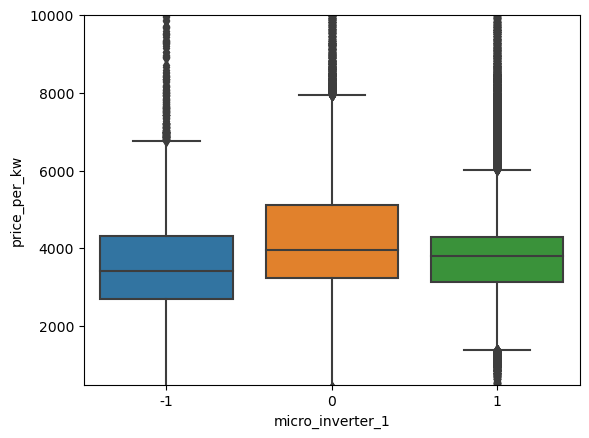

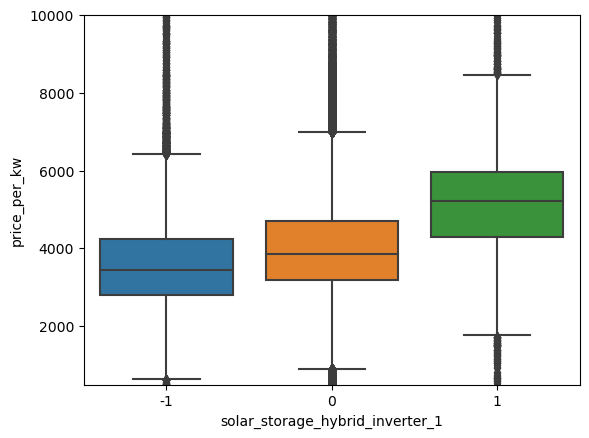

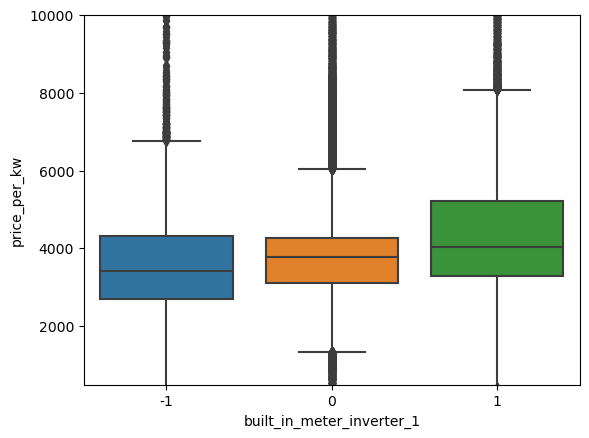

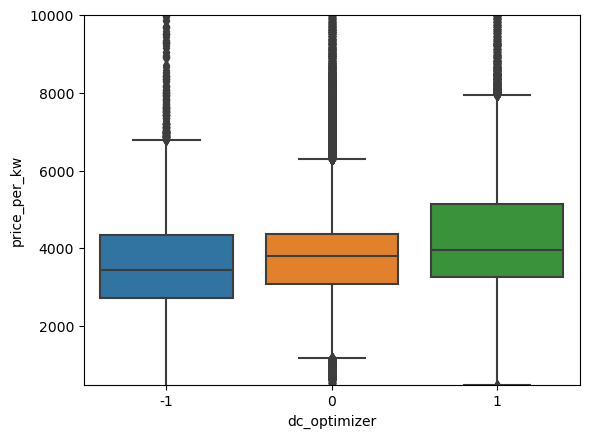

In [11]:
for col in data.columns:
    if data.dtypes[col] == 'int64' and 'state' not in col and 2 not in data[col].unique():
        sns.boxplot(x=col, y='price_per_kw', data=data)
        plt.ylim(500, 10000)
        plt.show()    

While there aren't any plots that show an obvious statistically significant difference between their yes (1) and no (0) values, 'self_installed' and 'additional_modules' appear to improve cost efficiency, while 'bipv_module_1', 'additional_inverters', and 'solar_storage_hybrid_inverter_1' all appear to reduce cost efficiency. These may prove important to model development.

I'll use the pearsonr function from Scipy Stats to calculate p-values for the aforementioned features to get a quick idea of whether their means are significantly different.
* How do I handle missing (-1) values?

In [20]:
# self_installed
si_non_null = data[data['self_installed'] != -1]
print(pearsonr(si_non_null['self_installed'], si_non_null['price_per_kw']))
print(pearsonr(data['self_installed'], data['price_per_kw']))

PearsonRResult(statistic=-0.04564949299184696, pvalue=1.0841329258875002e-90)
PearsonRResult(statistic=-0.013768429892141207, pvalue=3.3101635673042163e-10)


In [15]:
# additional_modules

pearsonr(data['additional_modules'], data['price_per_kw'])

PearsonRResult(statistic=0.017905754985332513, pvalue=3.034940519887365e-16)

In [16]:
# bipv_module_1

pearsonr(data['bipv_module_1'], data['price_per_kw'])

PearsonRResult(statistic=0.01679988950128991, pvalue=1.7585258448765175e-14)

In [17]:
# additional_inverters

pearsonr(data['additional_inverters'], data['price_per_kw'])

PearsonRResult(statistic=0.01988162398970984, pvalue=1.148758215181901e-19)

In [18]:
# solar_storage_hybrid_inverter_1

pearsonr(data['solar_storage_hybrid_inverter_1'], data['price_per_kw'])

PearsonRResult(statistic=0.03133411787962588, pvalue=2.1015519520440926e-46)